<a href="https://colab.research.google.com/github/WasudeoGurjalwar/AL_ML_Assignments/blob/main/Rain_Prediction_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv('imd_monthly_train.csv', compression='gzip')
df.head()


,pos,monthID,rain_sum,rain_mean,rain_std,tmin_mean,tmin_std,tmax_mean,tmax_std
0,"(10.5, 76.5)",1,5.298247,0.170911,0.951593,17.139032,0.995635,28.302258,0.769761
1,"(10.5, 77.5)",1,30.434262,0.981750,3.753896,17.600968,0.961833,28.270968,1.129780
2,"(10.5, 78.5)",1,34.014397,1.097239,3.222228,20.922581,0.974286,30.406452,1.234962
3,"(10.5, 79.5)",1,284.678233,9.183169,22.217352,21.787419,0.980483,29.621613,1.035568
4,"(11.5, 75.5)",1,19.827823,0.639607,2.764289,18.292903,1.010855,29.275161,0.657165


In [38]:
df['month'] = df.apply(lambda row: row['monthID']%12, axis=1)
df.head()
df.tail()

,pos,monthID,rain_sum,rain_mean,rain_std,tmin_mean,tmin_std,tmax_mean,tmax_std,month
71971,"(35.5, 77.5)",240,0.000000,0.000000,0.000000,-0.950856,1.435379,9.051020,2.789874,0
71972,"(8.5, 77.5)",240,170.252570,5.492018,11.605992,23.768272,0.328783,31.155465,0.868972,0
71973,"(9.5, 76.5)",240,42.997174,1.387006,4.198873,22.439362,0.370668,30.248712,0.918851,0
71974,"(9.5, 77.5)",240,57.187556,1.844760,4.325028,22.351099,0.371048,29.765670,0.908392,0
71975,"(9.5, 78.5)",240,160.171497,5.166822,13.372767,21.994756,0.423073,28.794138,0.789762,0


In [39]:
df['tmax_mean - tmin_mean'] = df.apply(lambda row: row['tmax_mean'] - row['tmin_mean'], axis=1)
df.tail()

,pos,monthID,rain_sum,rain_mean,rain_std,tmin_mean,tmin_std,tmax_mean,tmax_std,month,tmax_mean - tmin_mean
71971,"(35.5, 77.5)",240,0.000000,0.000000,0.000000,-0.950856,1.435379,9.051020,2.789874,0,10.001876
71972,"(8.5, 77.5)",240,170.252570,5.492018,11.605992,23.768272,0.328783,31.155465,0.868972,0,7.387193
71973,"(9.5, 76.5)",240,42.997174,1.387006,4.198873,22.439362,0.370668,30.248712,0.918851,0,7.809351
71974,"(9.5, 77.5)",240,57.187556,1.844760,4.325028,22.351099,0.371048,29.765670,0.908392,0,7.414571
71975,"(9.5, 78.5)",240,160.171497,5.166822,13.372767,21.994756,0.423073,28.794138,0.789762,0,6.799382


In [40]:
def linearregg(X , y):
    # split data into train-test set
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    # creating an object of LinearRegression class
    LR = LinearRegression()

    # fitting the training data
    LR.fit(x_train,y_train)

    # making predictions
    y_prediction =  LR.predict(x_test)

    mse = mean_squared_error(y_test ,y_prediction )

    return y_prediction , mse

In [47]:
# Creating differnt independent variables
loc = df.loc[(df['pos'] == "(15.5, 75.5)") ]
X = [loc[['rain_std']],
    loc[['rain_std' , 'tmax_mean']],
    loc[['rain_std' , 'tmax_mean' , 'tmin_mean']],
    loc[['rain_std' , 'tmax_mean' , 'tmin_mean' , 'tmax_mean - tmin_mean']],
    loc[['rain_std' , 'tmin_mean' , 'tmax_mean - tmin_mean']],
    loc[['rain_std' , 'tmin_mean']]
    ]

y = loc['rain_std']

In [48]:
predicted = []
MSE = []

for i in X:
    predd , mse = linearregg(i , y)
    predd = list(predd)
    predd = np.array(predd)

    predicted.append(predd)
    MSE.append(mse)

In [49]:
predicted[0].shape

(72,)

ValueError: x and y must have same first dimension, but have shapes (0,) and (72,)

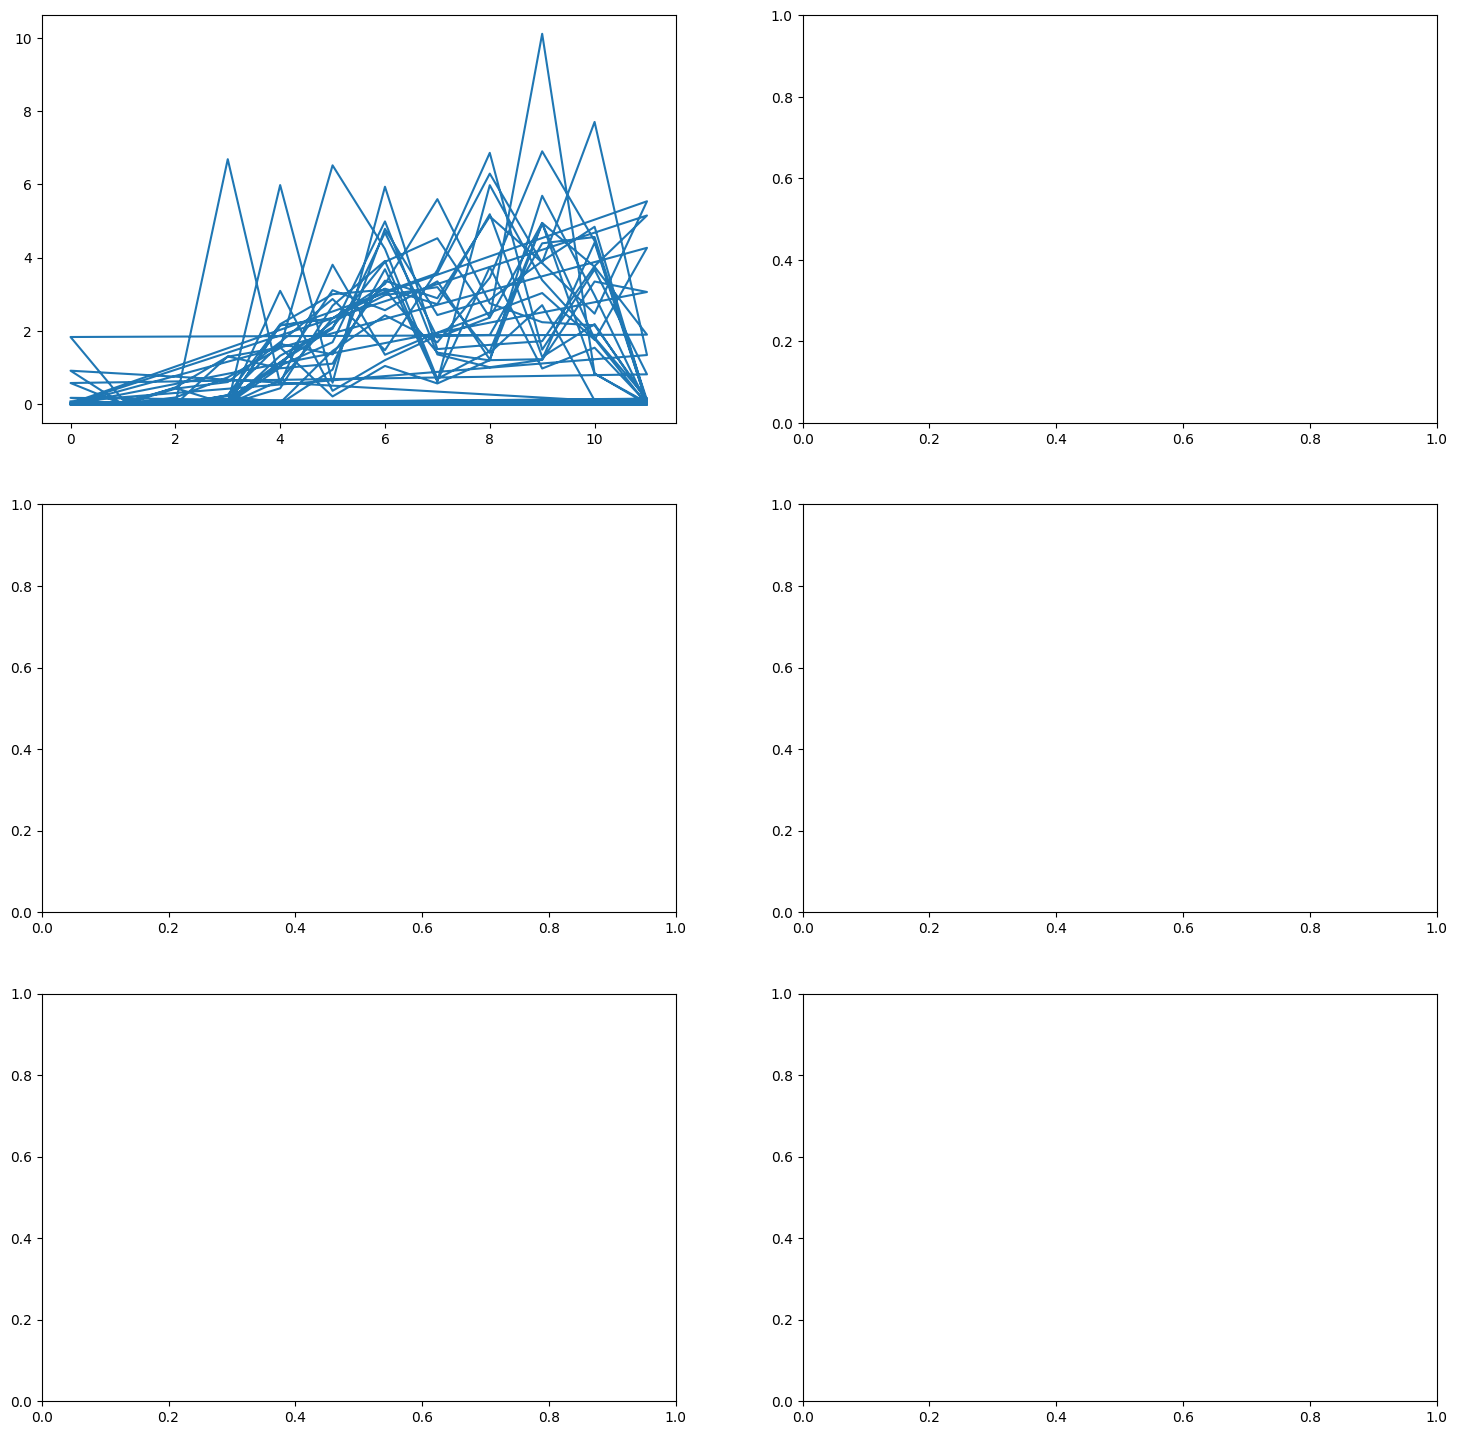

In [50]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2 , figsize = (18, 18))

ax1.plot(loc['monthID'] , loc['rain_mean'] , label = 'True')
ax1.plot(loc['monthID'][730:1044] , predicted[0], label = 'Predicted')
ax1.set_title('Parameters: Rain')
ax1.set(xlabel=f'mse = {MSE[0]}', ylabel='Rain')
ax1.legend()

ax2.plot(df['monthID'] , df['rain_mean'] , label = 'True')
ax2.plot(df['monthID'][730:1044] , predicted[1], label = 'Predicted')
ax2.set_title('Parameters: Rain, Tmax')
ax2.set(xlabel=f'mse = {MSE[1]}', ylabel='Rain')
ax2.legend()

ax3.plot(df['month'] , df['rain_mean'] , label = 'True')
ax3.plot(df['month'][730:1044] , predicted[2], label = 'Predicted')
ax3.set_title('Parameters: Rain , Tmax , Tmin')
ax3.set(xlabel=f'mse = {MSE[2]}', ylabel='Rain')
ax3.legend()

ax4.plot(df['month'] , df['rain_mean'] , label = 'True')
ax4.plot(df['month'][730:1044] , predicted[3], label = 'Predicted')
ax4.set_title('Parameters: Rain , Tmax , Tmin , Tmax - Tmin')
ax4.set(xlabel=f'mse = {MSE[3]}', ylabel='Rain')
ax4.legend()

ax5.plot(df['month'] , df['rain_mean'] , label = 'True')
ax5.plot(df['month'][730:1044] , predicted[4], label = 'Predicted')
ax5.set_title('Parameters : Tmax , Tmin , Tmax - Tmin')
ax5.set(xlabel=f'mse = {MSE[4]}', ylabel='Rain')
ax5.legend()

ax6.plot(df['month'] , df['rain_mean'] , label = 'True')
ax6.plot(df['month'][730:1044] , predicted[5], label = 'Predicted')
ax6.set_title('Parameters : Tmax , Tmin ')
ax6.set(xlabel=f'mse = {MSE[5]}', ylabel='Rain')
ax6.legend()

plt.show()